The `abstract` ***Stream*** `class` is the base for all streams.  
  
**Stream class members**  
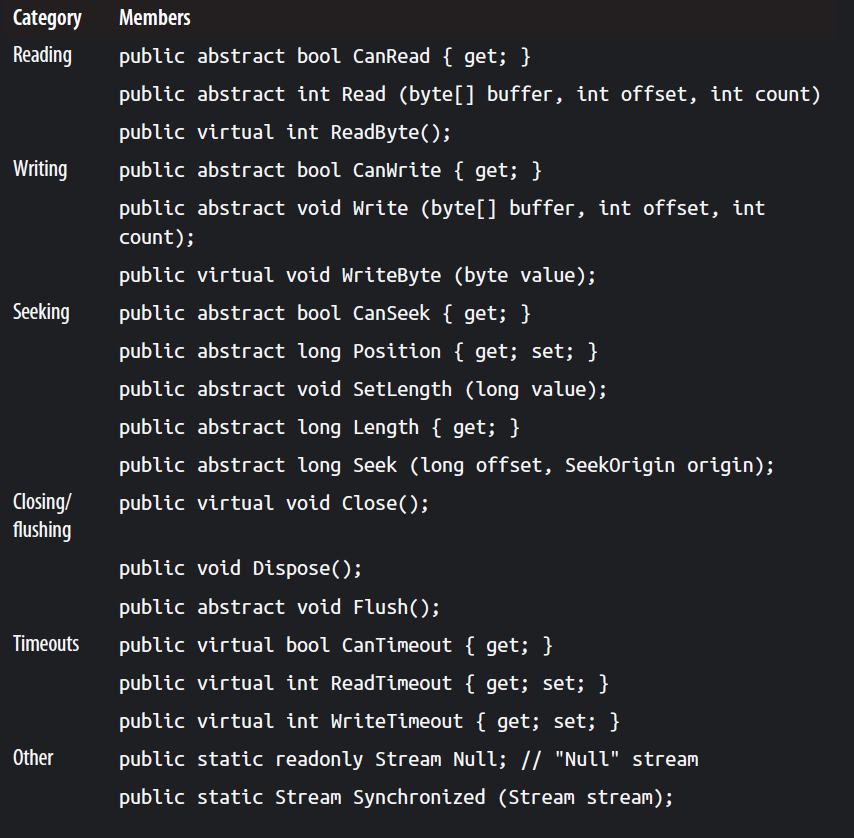

In [ ]:
using System;
using System.IO;
// Create a file called test.txt in the current directory:
using (Stream s = new FileStream ("test.txt", FileMode.Create))
{
    Console.WriteLine (s.CanRead); // True
    Console.WriteLine (s.CanWrite); // True
    Console.WriteLine (s.CanSeek); // True

    s.WriteByte (101);// 101 is ASCII code of 'e' so write e into text.txt
    s.WriteByte (102);// 102 is ASCII code of 'f' so write f into text.txt
    byte[] block = { 1, 2, 3, 4, 5 };
    s.Write (block, 0, block.Length); // Write block of 5 bytes

    Console.WriteLine (s.Length); // 7
    Console.WriteLine (s.Position); // 7

    s.Position = 0; // Move back to the start
    Console.WriteLine (s.ReadByte()); // 101
    Console.WriteLine (s.ReadByte()); // 102

    // Read from the stream back into the block array:
    Console.WriteLine (s.Read (block, 0, block.Length)); // 5
    
    // Assuming the last Read returned 5, we'll be at
    // the end of the file, so Read will now return 0:
    Console.WriteLine (s.Read (block, 0, block.Length)); // 0
}

In [ ]:
//async version 
using System.IO;

async static void AsyncDemo()
{
    using (Stream s = new FileStream ("test.txt", FileMode.Create))
    {
        byte[] block = { 1, 2, 3, 4, 5 };
        await s.WriteAsync (block, 0, block.Length); // Write asychronously
        s.Position = 0; // Move back to the start
        // Read from the stream back into the block array:
        Console.WriteLine (await s.ReadAsync (block, 0, block.Length)); // 5
    }
}

### Reading and Writing

If ***CanWrite*** returns `false`, the stream is `read-only`  
if ***CanRead*** returns `false`, the stream is `write-only`.

***Read*** receives a block of data **from** the `stream` **into** an `array`.  
  
It **returns** the `number of bytes received`, If it’s **less than count**, it means that either the `end of the stream has been reached` or the **stream** is giving you the `data in smaller chunks`

In [ ]:
Console.WriteLine (s.Read (block, 0, block.Length)); // 5

In [ ]:
// Assuming s is a stream:
// هیچ تضمینی وجود ندارد که متد read 1000 بایت را بخواند
byte[] data = new byte [1000];
s.Read(data, 0, data.Length);


In [ ]:
//Here’s the correct way to read a 1,000-byte stream

byte[] data = new byte [1000];
int bytesRead = 0;
int chunkSize = 1;
while (bytesRead < data.Length && chunkSize > 0)
{
    bytesRead += chunkSize = s.Read(data, bytesRead, data.Length - bytesRead);
}



***ReadByte*** method  reads just a `single byte`, returning `−1` to indicate the **end of the stream**.

### Seeking

A stream is ***seekable*** if `CanSeek` returns **true**.

<div dir="rtl" style="width:90%; margin:auto">
<p>"Seeking" در استریم‌ها به معنی تغییر موقعیت فعلی برای خواندن یا نوشتن داده‌ها در استریم است. این عملیات به شما اجازه می‌دهد تا به یک موقعیت خاص در استریم بروید و از آنجا شروع به خواندن یا نوشتن کنید. این مفهوم شبیه به حرکت هد خواندن/نوشتن در یک فایل روی دیسک سخت است.</p>

<h4>روش‌های مربوط به Seeking</h4>

<ol><li><p><strong><code>Seek(long offset, SeekOrigin origin)</code></strong>:
این متد موقعیت فعلی استریم را بر اساس مقدار <code>offset</code> و <code>origin</code> تغییر می‌دهد. پارامترها به شرح زیر هستند:</p><ul><li><strong><code>offset</code></strong>: تعداد بایت‌هایی که باید نسبت به موقعیت <code>origin</code> حرکت کنید. این مقدار می‌تواند مثبت (حرکت به جلو) یا منفی (حرکت به عقب) باشد.</li><li><strong><code>origin</code></strong>: یک مقدار از نوع <code>SeekOrigin</code> که مشخص می‌کند <code>offset</code> نسبت به کدام موقعیت محاسبه شود. مقادیر ممکن برای <code>SeekOrigin</code> عبارتند از:<ul><li><code>SeekOrigin.Begin</code>: موقعیت شروع استریم.</li><li><code>SeekOrigin.Current</code>: موقعیت فعلی استریم.</li><li><code>SeekOrigin.End</code>: انتهای استریم.</li></ul></li></ul></li><li><p><strong><code>Position</code></strong>:
این ویژگی (property) به شما اجازه می‌دهد تا موقعیت فعلی استریم را بخوانید یا به یک موقعیت خاص تنظیم کنید.</p></li></ol>

</div>

In [ ]:
using System.IO;

using (FileStream fs = new FileStream("test.txt", FileMode.Open))
{
    // حرکت به بایت شماره 50
    fs.Seek(50, SeekOrigin.Begin);

    // خواندن بایت از موقعیت جدید
    int byteValue = fs.ReadByte();
    Console.WriteLine("Byte at position 50: " + byteValue);

    // تغییر موقعیت با استفاده از ویژگی Position
    fs.Position = 75;

    // خواندن بایت از موقعیت جدید
    byteValue = fs.ReadByte();
    Console.WriteLine("Byte at position 75: " + byteValue);
}


<div dir="rtl" style="width:90%; margin:auto">
<p> همه استریم‌ها قابلیت Seeking ندارند. برای مثال، <code>NetworkStream</code> و <code>CryptoStream</code> قابلیت Seeking ندارند، در حالی که <code>FileStream</code> و <code>MemoryStream</code> این قابلیت را دارند.</p>
</div>

### Closing and Flushing

<div dir="rtl" style="width:90%; margin:auto">
<ul><li>استفاده از بلوک‌های <code>using</code> برای مدیریت خودکار استریم‌ها و آزادسازی منابع توصیه می‌شود.</li><li>متدهای <code>Dispose</code> و <code>Close</code> عملکرد یکسانی دارند و بستن مکرر استریم مشکلی ایجاد نمی‌کند.</li><li>استریم‌های دکوریتور با بستن استریم بیرونی، همه استریم‌ها را می‌بندند.</li><li><code>Flush</code> داده‌های بافر شده را به منبع ذخیره‌سازی می‌نویسد و هنگام بستن استریم به صورت خودکار فراخوانی می‌شود، بنابراین نیازی به فراخوانی دستی <code>Flush</code> قبل از <code>Close</code> نیست.</li>
<li>پس با استفاده از <code>using</code> که متد <code>Dispose</code> را فراخوانی میکند در حقیقت ما <code>Close</code> و <code>Flush</code> را هم انجام میدهیم، پس زمان استفاده از <code>using</code> تمام موارد برای آزاد سازی منابع انجام میشود و نیاز به کار اضافه ای نیست</li></ul>
</div>

### Timeouts

A ***stream*** supports `read` and `write` timeouts if `CanTimeout` returns true.  
***Network streams*** `support` timeouts; **file** and **memory** streams `do not`.  
  
The ***asynchronous*** `ReadAsync/WriteAsync` methods `do not support timeouts`;
instead you can pass a `cancellation token` into these methods.

In [ ]:
using System.IO;

using (var networkStream = new NetworkStream())
{
    if (networkStream.CanTimeout)
    {
        networkStream.ReadTimeout = 5000; // 5000 میلی‌ثانیه (5 ثانیه)
        networkStream.WriteTimeout = 5000;
    }

    try
    {
        byte[] buffer = new byte[1024];
        int bytesRead = networkStream.Read(buffer, 0, buffer.Length);
    }
    catch (IOException ex)
    {
        // مدیریت استثناء که نشان‌دهنده تایم‌اوت است
    }

}


In [ ]:
using System.IO;

using (var networkStream = new NetworkStream())
{
    if (networkStream.CanTimeout)
    {
        networkStream.ReadTimeout = 5000; // 5000 میلی‌ثانیه (5 ثانیه)
        networkStream.WriteTimeout = 5000;
    }

    CancellationTokenSource cts = new CancellationTokenSource();
    cts.CancelAfter(5000); // لغو بعد از 5000 میلی‌ثانیه (5 ثانیه)
    try
    {
        byte[] buffer = new byte[1024];
        int bytesRead = await networkStream.ReadAsync(buffer, 0, buffer.Length, cts.Token);
    }
    catch (OperationCanceledException ex)
    {
        // مدیریت استثناء که نشان‌دهنده لغو است
    }

}

### Thread Safety

<div dir="rtl" style="width:90%; margin:auto">
<p>به طور کلی، استریم‌ها ایمنی رشته را فراهم نمی‌کنند، یعنی دو رشته نمی‌توانند به صورت همزمان به یک استریم بخوانند یا بنویسند بدون اینکه احتمال بروز خطا وجود داشته باشد.</p>
<p><p><strong>متد Synchronized:</strong></p><ul><li>کلاس <code>Stream</code> یک راهکار ساده برای ایمنی رشته‌ها ارائه می‌دهد که از طریق متد استاتیک <code>Synchronized</code> انجام می‌شود.</li><li>این متد یک استریم از هر نوعی را می‌پذیرد و یک پوشش (wrapper) ایمن برای رشته‌ها بازمی‌گرداند.</li></ul></p>
</div>

In [ ]:
using System.IO;

using (Stream s = new FileStream ("test.txt", FileMode.Create))
{
    using( Stream threadSafeStream = Stream.Synchronized(s))
    {
        // نوشتن در استریم توسط چندین رشته
Task.Run(() => 
{
    byte[] data = Encoding.UTF8.GetBytes("Hello from thread 1");
    threadSafeStream.Write(data, 0, data.Length);
});

Task.Run(() => 
{
    byte[] data = Encoding.UTF8.GetBytes("Hello from thread 2");
    threadSafeStream.Write(data, 0, data.Length);
});

// خواندن از استریم توسط چندین رشته با قفل اضافی
object readLock = new object();
Task.Run(() => 
{
    lock (readLock)
    {
        byte[] buffer = new byte[1024];
        int bytesRead = threadSafeStream.Read(buffer, 0, buffer.Length);
        // پردازش داده‌های خوانده شده
    }
});

Task.Run(() => 
{
    lock (readLock)
    {
        byte[] buffer = new byte[1024];
        int bytesRead = threadSafeStream.Read(buffer, 0, buffer.Length);
        // پردازش داده‌های خوانده شده
    }
});

    }

}


### Backing Store Streams

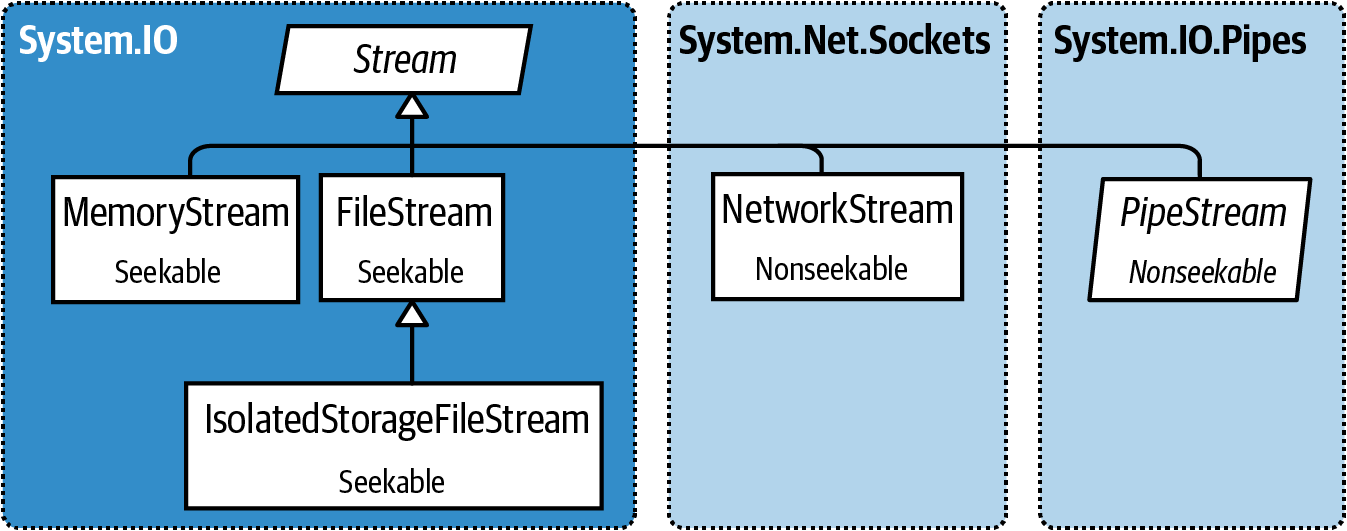

### FileStream

#### Constructing a FileStream  

In [ ]:
using System.IO;

FileStream fs1 = File.OpenRead ("readme.bin"); // Read-only
FileStream fs2 = File.OpenWrite ("writeme.tmp"); // Write-only
FileStream fs3 = File.Create ("readwrite.tmp"); // Read/write

<div dir="rtl" style="width:90%; margin:auto">
<p><strong>تفاوت‌های <code>OpenWrite</code> و <code>Create</code>:</strong></p>

<ul><li><strong>رفتار در صورت وجود فایل:</strong><ul><li><code>Create</code>: اگر فایل از قبل وجود داشته باشد، تمام محتوای موجود در فایل را پاک می‌کند (truncate) و فایل را از ابتدا آغاز می‌کند.</li><li><code>OpenWrite</code>: اگر فایل از قبل وجود داشته باشد، محتوای موجود را حفظ می‌کند و موقعیت استریم را در ابتدای فایل قرار می‌دهد. در نتیجه، اگر تعداد بایت‌هایی که نوشته می‌شود کمتر از تعداد بایت‌های موجود باشد، فایل ترکیبی از محتوای قدیمی و جدید خواهد داشت.</li></ul></li></ul>

<p>شما می‌توانید مستقیماً یک شیء <code>FileStream</code> را با استفاده از سازنده‌های آن ایجاد کنید.</p>
<p>سازنده‌های <code>FileStream</code> به شما امکان می‌دهند تا نام فایل یا دسته‌ی سطح پایین فایل (low-level file handle)، حالت‌های ایجاد و دسترسی فایل، و گزینه‌هایی برای اشتراک‌گذاری، بافرینگ و امنیت را مشخص کنید.</p>
</div>

In [ ]:
using System.IO;

using (var fs = new FileStream("readwrite.tmp", FileMode.Open))
{}

/*این مثال یک فایل موجود را برای دسترسی خواندن/نوشتن باز می‌کند
 بدون اینکه محتوای آن را بازنویسی کند.
*/

#### Specifying a filename

A ***filename*** can be either `absolute` (e.g., `c:\temp\test.txt`—or in **Unix**, `/tmp/test.txt`) or `relative` to the **current directory** (e.g., test.txt or temp\test.txt).

`AppDomain.CurrentDomain.BaseDirectory` returns the **application base directory**,
which in normal cases is the `folder containing the program’s executable`.

In [ ]:
using System.IO;

string baseFolder = AppDomain.CurrentDomain.BaseDirectory;
string logoPath = Path.Combine (baseFolder, "logo.jpg");
Console.WriteLine (File.Exists (logoPath));

#### Shortcut Methods on the File Class

In [ ]:
using System.IO;

//The following static methods read an entire file into memory in one step
File.ReadAllText ("returns a string");
File.ReadAllLines ("returns an array of strings");
File.ReadAllBytes ("returns a byte array");

//The following static methods write an entire file in one step
File.WriteAllText();
File.WriteAllLines();
File.WriteAllBytes();
File.AppendAllText ("great for appending to a log file");

`File.ReadLines`: this is `like ReadAllLines` **except** that it returns a ***lazily evaluated*** `IEnumerable<string>`.  
This is **more efficient** because it `doesn’t load` the `entire file` into memory at once.

In [ ]:
using System.IO;

int longLines = File.ReadLines ("filePath")
.Count (l => l.Length > 80);

#### Specifying a FileMode

In [ ]:
using System.IO;

using (var fs = new FileStream("readwrite.tmp", FileMode.Open /*FileMode*/ ))
{}

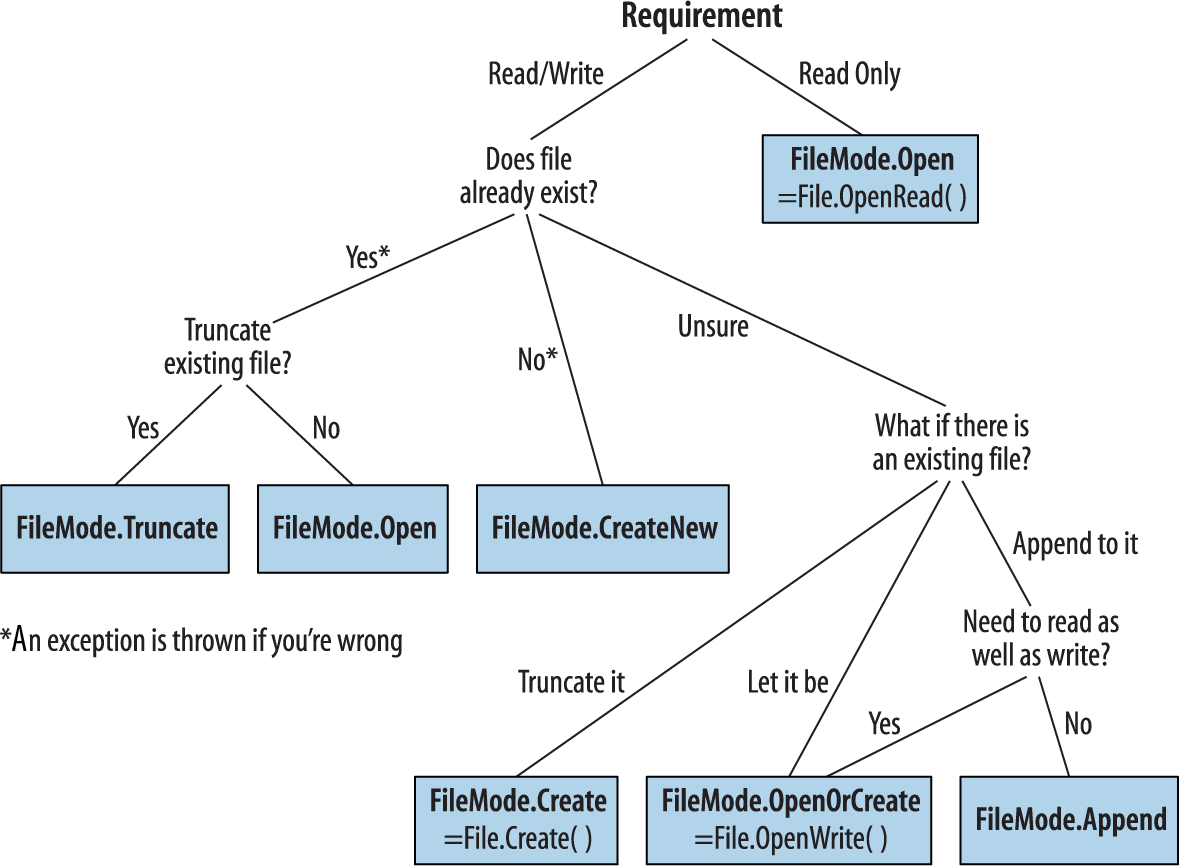

### MemoryStream

<div dir="rtl" style="width:90%; margin:auto">

<p><code>MemoryStream</code> یک جریان داده‌ای است که به جای فایل یا شبکه، داده‌ها را در حافظه (RAM) ذخیره می‌کند. این جریان برای کار با داده‌های موقتی و انتقال داده‌ها بین قسمت‌های مختلف یک برنامه بدون نیاز به ذخیره‌سازی دائمی بسیار مفید است.</p>

</div>

In [ ]:
using System.IO;

MemoryStream ms = new MemoryStream(); //جدید و خالی
MemoryStream ms1 = new MemoryStream(1024); // جدید با ظرفیت اولیه 1024 بایت

byte[] buffer = new byte[256];
MemoryStream ms2 = new MemoryStream(buffer);
// جدید را که داده‌های اولیه آن از یک آرایه بایت 256 بایتی گرفته شده است

byte[] data = Encoding.UTF8.GetBytes("Hello, World!");
ms2.Write(data, 0, data.Length);//نوشتن

ms2.Position = 0; // بازگشت به ابتدای جریان برای خواندن

byte[] buffer1 = new byte[ms.Length];
int bytesRead = ms.Read(buffer1, 0, buffer1.Length);
string text = Encoding.UTF8.GetString(buffer1, 0, bytesRead);//خواندن


<div dir="rtl" style="width:90%; margin:auto">
<h3>مزایای استفاده از MemoryStream</h3>
<ol><li><strong>سرعت بالا:</strong> چون داده‌ها در حافظه ذخیره می‌شوند، خواندن و نوشتن بسیار سریع‌تر از استفاده از فایل‌ها یا شبکه است.</li><li><strong>استفاده آسان:</strong> <code>MemoryStream</code> یک رابط ساده و کاربرپسند برای کار با داده‌های باینری ارائه می‌دهد.</li><li><strong>عدم نیاز به منابع خارجی:</strong> نیازی به فایل‌ها یا دستگاه‌های خارجی ندارد و همه چیز در حافظه انجام می‌شود.</li></ol>
</div>

### PipeStream

<div dir="rtl" style="width:90%; margin:auto">
<p>کلاس <code>PipeStream</code> در C# ابزاری برای ارتباط بین فرآیندها (IPC) از طریق پروتکل لوله‌های سیستم‌عامل فراهم می‌کند. این کلاس به شما اجازه می‌دهد که داده‌ها را بین دو فرآیند منتقل کنید. لوله‌ها (pipes) دو نوع اصلی دارند: لوله‌های ناشناس (anonymous pipes) و لوله‌های نام‌دار (named pipes). بیایید هر یک را به طور جداگانه بررسی کنیم:</p>

<h4>انواع PipeStream</h4>
<ol><li><p><strong>لوله‌های ناشناس (Anonymous Pipe):</strong></p><ul><li><strong>ارتباط یک‌طرفه:</strong> این نوع لوله‌ها برای ارتباط یک‌طرفه بین یک فرآیند والد (parent) و یک فرآیند فرزند (child) در همان کامپیوتر استفاده می‌شوند.</li><li><strong>سرعت بالا:</strong> به دلیل نداشتن سربار (overhead) شبکه، سریع‌تر هستند.</li></ul></li><li><p><strong>لوله‌های نام‌دار (Named Pipe):</strong></p><ul><li><strong>ارتباط دوطرفه:</strong> این نوع لوله‌ها امکان ارتباط دوطرفه بین فرآیندهای مختلف را فراهم می‌کنند.</li><li><strong>انعطاف‌پذیری بیشتر:</strong> می‌توانند برای ارتباط بین فرآیندهای مختلف در همان کامپیوتر یا بین کامپیوترهای مختلف در یک شبکه استفاده شوند.</li></ul></li></ol>

<h4>مزایای استفاده از PipeStream</h4>
<ul><li><strong>ارتباط بین فرآیندها (IPC):</strong> لوله‌ها برای ارتباط بین فرآیندهای مختلف در یک کامپیوتر مناسب هستند.</li><li><strong>بدون سربار شبکه:</strong> چون به پروتکل‌های شبکه متکی نیستند، هیچ سربار شبکه‌ای ندارند.</li><li><strong>بدون مشکل فایروال:</strong> لوله‌ها به دلیل عدم نیاز به شبکه، مشکلات مربوط به فایروال‌ها را ندارند.</li></ul>
</div>

***PipeStream*** is an `abstract` class with `four concrete subtypes`. Two are used for anonymous pipes and the other two for named pipes  

- **Anonymous pipes**: `AnonymousPipeServerStream` and `AnonymousPipeClientStream`
- **Named pipes**: `NamedPipeServerStream` and `NamedPipeClientStream`

#### Named pipes

**سرور**

In [ ]:
using System.IO;
using System.IO.Pipes;

class PipeServer
{
    static void Main()
    {
        using (NamedPipeServerStream pipeServer = new NamedPipeServerStream("testpipe", PipeDirection.InOut))
        {
            Console.WriteLine("Named Pipe Server waiting for connection...");
            pipeServer.WaitForConnection();

            using (StreamReader reader = new StreamReader(pipeServer))
            using (StreamWriter writer = new StreamWriter(pipeServer))
            {
                writer.AutoFlush = true;
                writer.WriteLine("Hello from server!");
                string message = reader.ReadLine();
                Console.WriteLine("Received from client: " + message);
            }
        }
    }
}


**کلاینت**

In [ ]:
using System.IO;
using System.IO.Pipes;

class PipeClient
{
    static void Main()
    {
        using (NamedPipeClientStream pipeClient = new NamedPipeClientStream(".", "testpipe", PipeDirection.InOut))
        {
            pipeClient.Connect();

            using (StreamReader reader = new StreamReader(pipeClient))
            using (StreamWriter writer = new StreamWriter(pipeClient))
            {
                writer.AutoFlush = true;
                string message = reader.ReadLine();
                Console.WriteLine("Received from server: " + message);
                writer.WriteLine("Hello from client!");
            }
        }
    }
}


#### Anonymous pipes

An ***anonymous pipe*** provides a `one-way` **communication** stream between a parent and child process.

In [ ]:
// فرآیند والد:

using System.IO;
using System.IO.Pipes;
using System.Diagnostics;

class ParentProcess
{
    static void Main()
    {
        using (AnonymousPipeServerStream pipeServer = new AnonymousPipeServerStream(PipeDirection.Out))
        {
            Console.WriteLine("Pipe handle: " + pipeServer.GetClientHandleAsString());

            Process child = new Process();
            child.StartInfo.FileName = "ChildProcess.exe";
            child.StartInfo.Arguments = pipeServer.GetClientHandleAsString();
            child.Start();

            using (StreamWriter writer = new StreamWriter(pipeServer))
            {
                writer.AutoFlush = true;
                writer.WriteLine("Hello from parent!");
            }

            child.WaitForExit();
        }
    }
}


In [ ]:
// فرآیند فرزند:

using System.IO;
using System.IO.Pipes;

class ChildProcess
{
    static void Main(string[] args)
    {
        using (AnonymousPipeClientStream pipeClient = new AnonymousPipeClientStream(PipeDirection.In, args[0]))
        {
            using (StreamReader reader = new StreamReader(pipeClient))
            {
                string message = reader.ReadLine();
                Console.WriteLine("Received from parent: " + message);
            }
        }
    }
}


### BufferedStream

<div dir="rtl" style="width:90%; margin:auto">

<p>کلاس <code>BufferedStream</code> در C# یک لایه بافر بین یک جریان (stream) و خواندن یا نوشتن داده‌ها ایجاد می‌کند. بافر کردن (buffering) می‌تواند عملکرد I/O را بهبود بخشد زیرا باعث کاهش تعداد عملیات خواندن یا نوشتن مستقیم به منبع می‌شود. به جای اینکه هر بار داده‌ها مستقیماً خوانده یا نوشته شوند، داده‌ها ابتدا به بافر منتقل می‌شوند و سپس به صورت دسته‌ای پردازش می‌شوند.</p>
<h3>ویژگی‌ها و مزایای BufferedStream</h3>
<ol><li><p><strong>بهبود عملکرد:</strong></p><ul><li><code>BufferedStream</code> تعداد عملیات فیزیکی I/O را کاهش می‌دهد. به جای اینکه هر بار یک بایت را بخواند یا بنویسد، داده‌ها را به صورت دسته‌ای پردازش می‌کند.</li><li>این کار به ویژه در مورد عملیات‌های I/O کند مانند دسترسی به دیسک یا شبکه مفید است.</li></ul></li><li><p><strong>پشتیبانی از بافر کردن:</strong></p><ul><li><code>BufferedStream</code> به شما اجازه می‌دهد که اندازه بافر را تعیین کنید، که می‌تواند بر اساس نیازهای خاص برنامه تنظیم شود.</li></ul></li></ol>

</div>

In [ ]:
//نوشتن به فایل با استفاده از BufferedStream:

using System;
using System.IO;

class Program
{
    static void Main()
    {
        string filePath = "example.txt";

        // ایجاد FileStream برای نوشتن به فایل
        using (FileStream fileStream = new FileStream(filePath, FileMode.Create, FileAccess.Write))
        {
            // ایجاد BufferedStream با بافر 4096 بایت
            using (BufferedStream bufferedStream = new BufferedStream(fileStream, 4096))
            {
                byte[] data = System.Text.Encoding.UTF8.GetBytes("Hello, BufferedStream!");
                bufferedStream.Write(data, 0, data.Length);
            }
        }

        Console.WriteLine("Data written to file using BufferedStream.");
    }
}


In [ ]:
// خواندن از فایل با استفاده از BufferedStream:

using System;
using System.IO;

class Program
{
    static void Main()
    {
        string filePath = "example.txt";

        // ایجاد FileStream برای خواندن از فایل
        using (FileStream fileStream = new FileStream(filePath, FileMode.Open, FileAccess.Read))
        {
            // ایجاد BufferedStream با بافر 4096 بایت
            using (BufferedStream bufferedStream = new BufferedStream(fileStream, 4096))
            {
                byte[] data = new byte[1024];
                int bytesRead = bufferedStream.Read(data, 0, data.Length);
                string content = System.Text.Encoding.UTF8.GetString(data, 0, bytesRead);

                Console.WriteLine("Data read from file using BufferedStream: " + content);
            }
        }
    }
}
